### NeoStats - Python for Data Science
##### Introduction to Python Language  (Python 3) 
In this notebook we will cover the following: 
- Date / Time / Time Series
- Handling time in Pandas
- Case 01: Covid-19 Analysis
- Case 02: Stock Price Analysis

In the next one we will look at:
- Processing JSON/Xls
- Web Scraping
- Relational Database
- Data Pipeline

##### 1. Date  & Time : 
- The Python standard library includes data types for date and time data, as well as calendar-related functionality. 
- The datetime.datetime type, or simply datetime, is widely used

In [7]:
#The datetime module supplies classes for manipulating dates and times.
from datetime import *

In [8]:
now = datetime.now()
print("Year:",now.year, "Month:", now.month, "Date:",now.day)

Year: 2022 Month: 3 Date: 21


In [9]:
#Time difference - timedelta
timediff = datetime.now() - datetime(2020, 3, 22)        # days since lockdown
timediff

datetime.timedelta(729, 33478, 997345)

In [10]:
timediff.days , timediff.seconds, timediff.microseconds

(729, 33478, 997345)

In [11]:
#Date arithmetic
d = datetime(2021, 12, 31)
t = timedelta(days=10)    
d2 = d + t
d2.isoformat()

'2022-01-10T00:00:00'

In [12]:
d2.weekday()                   # week starts from Monday: 0

0

In [13]:
today = datetime.now()
print('Week #:',today.isocalendar()[1])

Week #: 12


In [14]:
#Formatting 
d2.strftime("%A, %d %B,%Y")                        #%b - Jan, %y - 22

'Monday, 10 January,2022'

In [15]:
#The dateutil module provides powerful extensions to the standard datetime module, available in Python.
from dateutil.parser import parse

In [16]:
date = parse('Mar 19, 2022 6:45 PM')              #can parsing almost any human-intelligible date representation
date

datetime.datetime(2022, 3, 19, 18, 45)

In [17]:
t1 = time(13,20,13,40)
print(t1)
print(type(t1))

13:20:13.000040
<class 'datetime.time'>


In [18]:
import calendar
print(calendar.calendar(2022))

                                  2022

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                1  2          1  2  3  4  5  6          1  2  3  4  5  6
 3  4  5  6  7  8  9       7  8  9 10 11 12 13       7  8  9 10 11 12 13
10 11 12 13 14 15 16      14 15 16 17 18 19 20      14 15 16 17 18 19 20
17 18 19 20 21 22 23      21 22 23 24 25 26 27      21 22 23 24 25 26 27
24 25 26 27 28 29 30      28                        28 29 30 31
31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
             1  2  3                         1             1  2  3  4  5
 4  5  6  7  8  9 10       2  3  4  5  6  7  8       6  7  8  9 10 11 12
11 12 13 14 15 16 17       9 10 11 12 13 14 15      13 14 15 16 17 18 19
18 19 20 21 22 23 24      16 17 18 19 20 21 22      20 21 22 23 24 25 26
25 26 27 28 29 30         23 24 

In [19]:
#Date time in Pandas
import pandas as pd 
import numpy as np 

##### 2  Handling time in Pandas

- Pandas contains extensive capabilities and features for working with time series data. 
- Using the NumPy datetime64 and timedelta64 dtypes, pandas has functionality for manipulating time series data.

Parsing time series information from various sources and formats using to_datetime(): 
Many input types are supported, and lead to different output types:
  - scalars can be int, float, str, datetime object.
       - They are converted to Timestamp when possible, otherwise they are converted to datetime.datetime. 
       - None/NaN/null scalars are converted to NaT.

  - array-like can contain int, float, str, datetime objects. 
      - They are converted to DatetimeIndex when possible, otherwise they are converted to Index with object dtype, containing datetime.datetime. 
      - None/NaN/null entries are converted to NaT in both cases.
  - Series:
      - They are converted to Series with datetime64 dtype when possible, otherwise they are converted to Series with object dtype, containing datetime.datetime. 
      - None/NaN/null entries are converted to NaT in both cases.
  - DataFrame/dict-like :
      - They are converted to Series with datetime64 dtype.

In [20]:
pd.to_datetime(10, unit="D")

Timestamp('1970-01-11 00:00:00')

In [21]:
pd.to_datetime([1, 2, 3], unit="D", origin=pd.Timestamp("2000-01-01"))

DatetimeIndex(['2000-01-02', '2000-01-03', '2000-01-04'], dtype='datetime64[ns]', freq=None)

In [22]:
pd.to_datetime('24th of April, 2020')

Timestamp('2020-04-24 00:00:00')

In [23]:
datestrs = ['7/6/2011', '8/6/2011']
pd.to_datetime(datestrs)                        

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [24]:
pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')

datetime.datetime(1300, 1, 1, 0, 0)

In [25]:
# to_daterange() - Returns the range of equally spaced time points 
pd.date_range(start='1/1/2018', 
              end='1/08/2018', 
              freq='D')                   #freq = D- Calender day, B- business day, W- week, M- Month, Q - Quarter, H-Hour etc

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [26]:
# Creating custom date range 
start = datetime(2022, 3, 1)
end = datetime(2022, 4, 1)
weekmask = "Mon Wed Fri"
holidays = [datetime(2022, 3, 18), datetime(2022, 3, 24)]
pd.bdate_range(start, end, freq="C", weekmask=weekmask, holidays=holidays)

DatetimeIndex(['2022-03-02', '2022-03-04', '2022-03-07', '2022-03-09',
               '2022-03-11', '2022-03-14', '2022-03-16', '2022-03-21',
               '2022-03-23', '2022-03-25', '2022-03-28', '2022-03-30',
               '2022-04-01'],
              dtype='datetime64[ns]', freq='C')

In [2]:
import pandas as pd

today = pd.to_datetime("today")


In [27]:
#Date arithmetic with pandas datetime 
today = pd.Timestamp("2022-03-19")
DayAfterTomorrow = today + pd.Timedelta("2 day")
DayAfterTomorrow.day_name()

'Monday'

In [28]:
nextBDay = today + pd.offsets.BDay()                  #next business day 
nextBDay.date()

datetime.date(2022, 3, 21)

In [29]:
#Indexing - One of the main uses for DatetimeIndex is as an index for pandas objects
timeindex = pd.date_range("2022-01-01", periods= 10, freq="5D")
ts = pd.Series(np.random.randn(len(timeindex)), index=timeindex)
ts

2022-01-01   -1.015838
2022-01-06    0.136212
2022-01-11   -0.505482
2022-01-16    0.099294
2022-01-21   -0.563711
2022-01-26   -0.910668
2022-01-31    1.134039
2022-02-05   -0.222921
2022-02-10   -0.916361
2022-02-15    0.787210
Freq: 5D, dtype: float64

In [30]:
ts[1:5]                                 # row 1 to 4

2022-01-06    0.136212
2022-01-11   -0.505482
2022-01-16    0.099294
2022-01-21   -0.563711
Freq: 5D, dtype: float64

In [31]:
ts[::3]                                 # every third row

2022-01-01   -1.015838
2022-01-16    0.099294
2022-01-31    1.134039
2022-02-15    0.787210
Freq: 15D, dtype: float64

In [32]:
ts["Jan-2022"]                          # intel inside ! 

2022-01-01   -1.015838
2022-01-06    0.136212
2022-01-11   -0.505482
2022-01-16    0.099294
2022-01-21   -0.563711
2022-01-26   -0.910668
2022-01-31    1.134039
Freq: 5D, dtype: float64

In [33]:
ts["2022-01-16" : "2022-01-31"]         # includes the endpoints 

2022-01-16    0.099294
2022-01-21   -0.563711
2022-01-26   -0.910668
2022-01-31    1.134039
Freq: 5D, dtype: float64

In [34]:
ts.truncate(before="2022-01-16", after="2022-01-31")

2022-01-16    0.099294
2022-01-21   -0.563711
2022-01-26   -0.910668
2022-01-31    1.134039
Freq: 5D, dtype: float64

In [35]:
ts.shift(2)                        #creating lags and leads

2022-01-01         NaN
2022-01-06         NaN
2022-01-11   -1.015838
2022-01-16    0.136212
2022-01-21   -0.505482
2022-01-26    0.099294
2022-01-31   -0.563711
2022-02-05   -0.910668
2022-02-10    1.134039
2022-02-15   -0.222921
Freq: 5D, dtype: float64

In [36]:
ts.resample("10D").asfreq()

2022-01-01   -1.015838
2022-01-11   -0.505482
2022-01-21   -0.563711
2022-01-31    1.134039
2022-02-10   -0.916361
Freq: 10D, dtype: float64

In [37]:
ts.resample("2D").asfreq()                     #What would happen here?

2022-01-01   -1.015838
2022-01-03         NaN
2022-01-05         NaN
2022-01-07         NaN
2022-01-09         NaN
2022-01-11   -0.505482
2022-01-13         NaN
2022-01-15         NaN
2022-01-17         NaN
2022-01-19         NaN
2022-01-21   -0.563711
2022-01-23         NaN
2022-01-25         NaN
2022-01-27         NaN
2022-01-29         NaN
2022-01-31    1.134039
2022-02-02         NaN
2022-02-04         NaN
2022-02-06         NaN
2022-02-08         NaN
2022-02-10   -0.916361
2022-02-12         NaN
2022-02-14         NaN
Freq: 2D, dtype: float64

In [38]:
df = pd.DataFrame(
    np.random.rand(120, 3),
     index=pd.date_range("1/1/2012", freq="H", periods=120),
     columns=["A", "B", "C"]
     )

r = df.resample("D")
r.sum()

,A,B,C
2012-01-01,12.173050,11.886103,10.501112
2012-01-02,13.336638,9.049599,10.568952
2012-01-03,12.070424,10.211848,12.647028
2012-01-04,11.671509,10.365020,12.094158
2012-01-05,10.874658,10.444866,10.961464


In [39]:
r["A"].agg([np.sum, np.mean, np.std])

,sum,mean,std
2012-01-01,12.173050,0.507210,0.313232
2012-01-02,13.336638,0.555693,0.276306
2012-01-03,12.070424,0.502934,0.277471
2012-01-04,11.671509,0.486313,0.301494
2012-01-05,10.874658,0.453111,0.283747


In [40]:
r.agg({"A": np.sum, "B": np.mean})

,A,B
2012-01-01,12.173050,0.495254
2012-01-02,13.336638,0.377067
2012-01-03,12.070424,0.425494
2012-01-04,11.671509,0.431876
2012-01-05,10.874658,0.435203


#### 3.1  Case Study : Covid-19 Analysis

In [41]:
# Import libraries
import pandas as pd
import numpy as np

In [42]:
# Import data
coviddata = "https://api.covidtracking.com/v1/us/daily.csv"
covid_df = pd.read_csv(coviddata)

In [43]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

In [44]:
covid_df['date']= pd.to_datetime(covid_df['date'],format='%Y%m%d')

In [45]:
covid_df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,2021-03-07,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,2021-03-06,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,2021-03-05,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,2021-03-04,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,2021-03-03,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


In [46]:
#flip the data 
df = covid_df[::-1]

In [47]:
# select columns to work with
df = df.loc[:,['date','states','positiveIncrease','deathIncrease','hospitalizedIncrease']] 
df.set_index('date',inplace=True)
df.sample(20)

,states,positiveIncrease,deathIncrease,hospitalizedIncrease
date,,,,
2020-07-24,56,75095,1174,3066
2020-07-14,56,58618,742,2322
2020-11-22,56,154188,923,2291
2020-04-04,56,33122,1478,1732
2020-03-13,51,858,5,6
2020-03-19,56,4606,51,34
2020-05-24,56,19122,689,787
2020-11-19,56,187932,2010,4456
2020-04-30,56,30063,2153,1425


In [48]:
df.plot()

<AxesSubplot:xlabel='date'>

In [49]:
#lets get the monthly averages 
monthly_df = df.resample("M").sum()

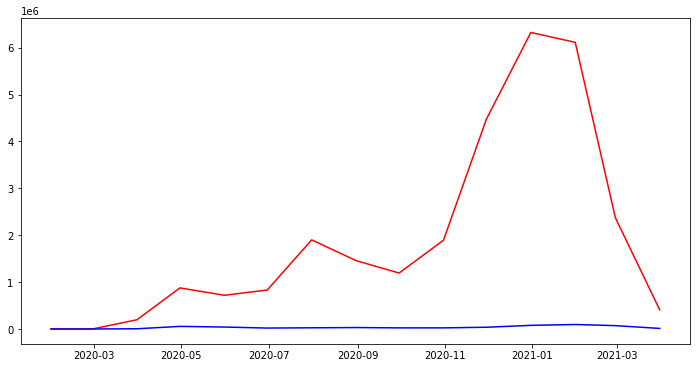

In [50]:
# install plot library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig,ax = plt.subplots(figsize=(12,6))

ax.plot(monthly_df.index,monthly_df['positiveIncrease'],color='red',label='Avg Monthly infections')
ax.plot(monthly_df.index, monthly_df["deathIncrease"], color="blue",label='Avg Monthly deaths')

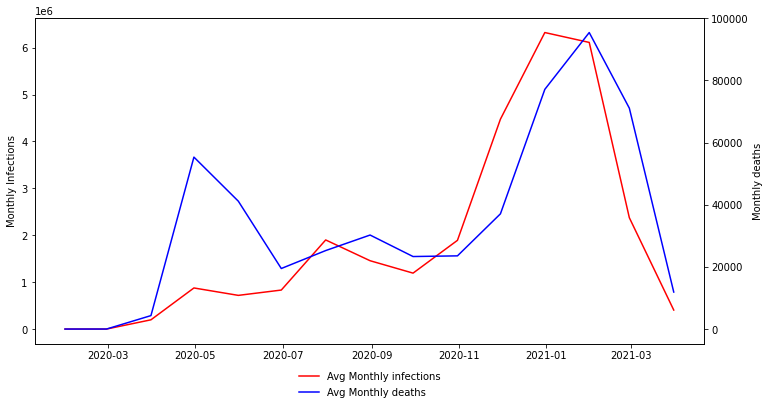

In [51]:
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(monthly_df.index,monthly_df['positiveIncrease'],color='red',label='Avg Monthly infections')
ax.set_ylabel('Monthly Infections')

ax2=ax.twinx()
ax2.plot(monthly_df.index, monthly_df["deathIncrease"], color="blue",label='Avg Monthly deaths')

ax2.grid(False) # turn off grid for second Y axis
ax2.set_ylabel('Monthly deaths')

leg = ax.legend(loc='center', frameon=False,bbox_to_anchor=(0.5, -0.10))
leg2= ax2.legend(loc='center', frameon=False,bbox_to_anchor=(0.49, -0.15))

#### 3.2  Case Study : Stock Price Analysis

In [52]:
import pandas_datareader as pdr               #for retreiving stock prices

In [53]:
# Have a list of tech stock tickers
tickers = ['msft', 'aapl', 'tsla', 'nvda']
stockdata = pdr.get_data_yahoo(tickers)

In [54]:
df = stockdata.Close
df.head()

Symbols,msft,aapl,tsla,nvda
Date,,,,
2017-03-21,64.209999,34.959999,50.136002,26.477501
2017-03-22,65.029999,35.355000,51.001999,27.017500
2017-03-23,64.870003,35.230000,50.956001,26.772499
2017-03-24,64.980003,35.160000,52.632000,26.867500
2017-03-27,65.099998,35.220001,54.043999,27.062500


<AxesSubplot:xlabel='Date'>

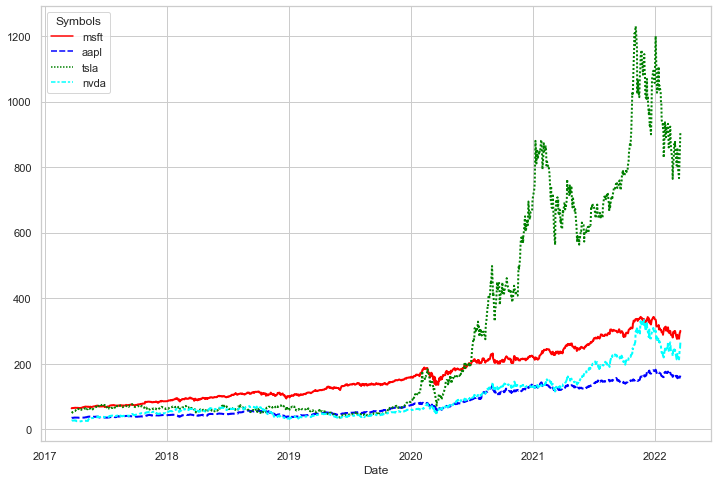

In [55]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,8)})          #increase the figure size

sns.lineplot(data=df, linewidth=2, palette=['red', 'blue', 'green', 'aqua'])

In [56]:
data_fill = df.asfreq("D", method='ffill')
data_fill.head()

ValueError: cannot reindex a non-unique index with a method or limit

In [ ]:
def pct_change (df):
    change = (df - df.shift(-1))/df
    return change


pchange_df = data_fill.apply(pct_change)
pchange_df.head()

In [ ]:
sns.set_style(rc={'figure.figsize':(12,8)})
sns.heatmap(
        data=pchange_df.corr(),  # our correlation matrix
        linewidths=0.3,          # the width of lines separating the matrix squares
        square=True
)

In [ ]:
# Generate Mask
mask = np.triu(np.ones_like(pchange_df.corr(), dtype=bool))
np.fill_diagonal(mask, False)  # keeps the diagonal
# Creat heatmap with same syntax but add a "mask" argument
sns.set_style(rc={'figure.figsize':(12,8)})
sns.heatmap(
        data=pchange_df.corr(),  # our correlation matrix
        linewidths=0.3,          # the width of lines separating the matrix squares
        square=True,
        mask=mask
)

In [ ]:
sns.kdeplot(data=pchange_df)